## What is Outliers ?
#### Outliers in Datasets

Outliers are data points that are significantly different from other data points in a dataset. They are values that are far away from the mean or median of the data, and can be considered unusual or anomalous.

#### Types of Outliers

There are two types of outliers:

* **Univariate outliers**: These are data points that are far away from the mean or median of a single variable.
* **Multivariate outliers**: These are data points that are far away from the centroid (mean or median) of multiple variables.

#### Causes of Outliers

Outliers can be caused by various factors, including:

* **Measurement errors**: Incorrect or imprecise measurements can lead to outliers.
* **Data entry errors**: Typos or incorrect data entry can result in outliers.
* **Sampling errors**: Sampling biases or errors can lead to outliers.
* **Natural variability**: Some datasets may naturally have outliers due to the underlying distribution of the data.

#### Effects of Outliers

Outliers can have a significant impact on statistical analysis and modeling, including:

* **Skewed results**: Outliers can skew the results of statistical tests and models, leading to incorrect conclusions.
* **Increased variance**: Outliers can increase the variance of the data, making it more difficult to model.
* **Poor model fit**: Outliers can lead to poor model fit, as models may not be able to capture the underlying patterns in the data.

#### Detecting Outliers

There are various methods for detecting outliers, including:

* **Visual inspection**: Plotting the data to visually identify outliers.
* **Statistical methods**: Using statistical tests, such as the Z-score or Modified Z-score, to identify outliers.
* **Distance-based methods**: Using distance-based measures, such as the Mahalanobis distance, to identify outliers.

#### Handling Outliers

Once outliers are detected, they can be handled in various ways, including:

* **Removing outliers**: Removing outliers from the dataset to prevent them from skewing the results.
* **Transforming data**: Transforming the data to reduce the impact of outliers.
* **Using robust methods**: Using robust statistical methods that are resistant to outliers.

<br>

### 1. Z-Score Removal 

**It is actually used only for a normalized dataset ony.**
<h5>What is a Perfectly Normalized Data?</h5>
It is a type of distribution where mean is at the center and the range [mean - standard deviation , mean + standard deviation] holds the <mark>68.2%</mark> data, [mean - 2*standard deviation , mean + 2*standard deviation] holds the <mark>95.4%</mark> data and [mean - 3*standard deviation , mean + 3*standard deviation] holds the <mark>99.7%</mark> data and the remainings are counted as the outliers.

**Outliers Treatments**
* Trimming (Delete the outlieres)
* Capping (Cap the outlieres with the max or min value) 

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [33]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day42-outlier-removal-using-zscore/placement.csv')

<Axes: xlabel='placement_exam_marks', ylabel='Density'>

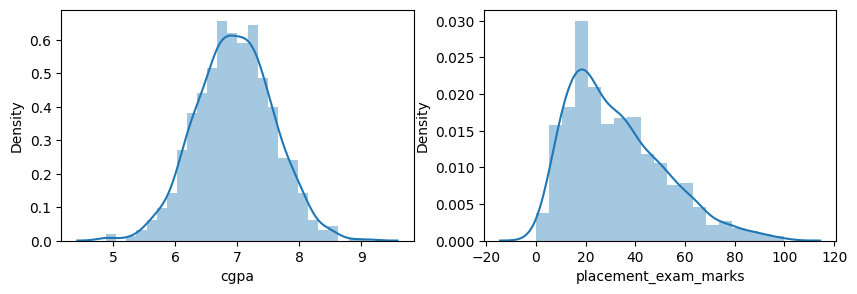

In [34]:
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
sns.distplot(df['cgpa'])

plt.subplot(1, 2, 2)
sns.distplot(df['placement_exam_marks'])


In [35]:
# Some statical analysis
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [41]:
# Finding the boundries of the outliers
highest = df['cgpa'].mean() + 3*(df['cgpa'].std())
lowest = df['cgpa'].mean() - 3*(df['cgpa'].std())

# Filtering columns of the outliers uning the trimming method : 
cgpa_trimmed = df[(df['cgpa'] >= lowest) & (df['cgpa'] <= highest)]
cgpa_trimmed.describe()

# Filtering the outliers using the capping method
cgpa_capped = df['cgpa'].apply(lambda x: highest if x > highest else lowest if x < lowest else x)
cgpa_capped

0      7.190000
1      7.460000
2      7.540000
3      6.420000
4      7.230000
         ...   
995    8.808934
996    8.808934
997    5.113546
998    8.620000
999    5.113546
Name: cgpa, Length: 1000, dtype: float64

### 2. IQR Methode for the  outliers detection.
**It can be used for skewed data as well**

In [42]:
# As the placement exam marks are skewed data so we will apply IQR methode for detection of outliers

# Finding the boundries of the outliers
iqr = df['placement_exam_marks'].quantile(0.75) - df['placement_exam_marks'].quantile(0.25)
highest = df['placement_exam_marks'].quantile(0.75) + 1.5*iqr
lowest = df['placement_exam_marks'].quantile(0.25) - 1.5*iqr

# Filtering columns of the outliers uning the trimming method : 
placement_exam_marks_trimmed = df[(df['placement_exam_marks'] >= lowest) & (df['placement_exam_marks'] <= highest)]
placement_exam_marks_trimmed.describe()

# Filtering the outliers using the capping method
placement_exam_marks_capped = df['placement_exam_marks'].apply(lambda x: highest if x > highest else lowest if x < lowest else x)
placement_exam_marks_capped.describe()

count    1000.000000
mean       32.136500
std        18.865419
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max        84.500000
Name: placement_exam_marks, dtype: float64

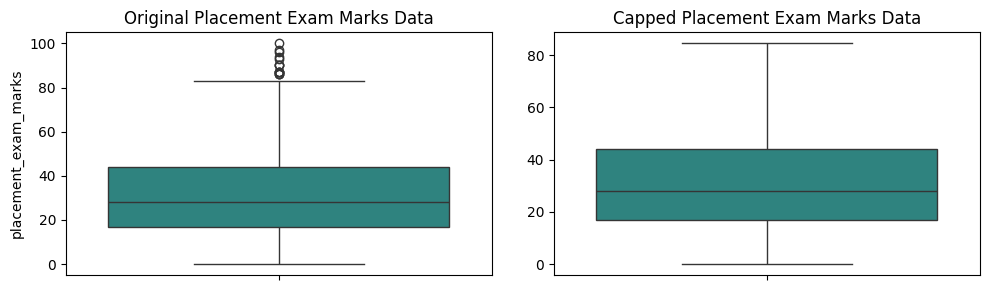

In [48]:
plt.figure(figsize=(10, 3))

# First subplot (original data)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
sns.boxplot(y=df['placement_exam_marks'], palette='viridis')
plt.title('Original Placement Exam Marks Data')

# Second subplot (capped data)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
sns.boxplot(placement_exam_marks_capped, palette='viridis')
plt.ylabel(' ')
plt.title('Capped Placement Exam Marks Data')

# Adjust layout and display
plt.tight_layout()
plt.show()